In [1]:
from inference import reid_inference
from utils.to_sqlite import insert_vector_db, insert_human_db, insert_infer_db, load_gallery_from_db, convertToBinaryData, load_human_db, load_images_from_db
import numpy as np
import torch
from PIL import Image


#init class
reid = reid_inference()

Loading pretrained ImageNet model......
Loading pretrained model from model/reid_R26.pth
Model loaded with weight from model/reid_R26.pth
Ready to Eval
Loading from DB...
Connection error to Sql no such table: human_table
Data loaded. You can start infer an image using to_gallery_feat --> query_feat --> infer


100 100 100 100
Image in 10th row is 20_NJW3_20210612T131025_420 with cam ID = 20


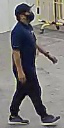

In [4]:
#BY LOADING REID CLASS, WE WILL IMPORT DATA FROM VECTORKB INTO MEMORY
print(len(reid.all_img_id), len(reid.all_patch_img), len(reid.all_gal_feat), len(reid.all_cam_id))
print("Image in 10th row is", reid.all_img_id[10], "with cam ID =", reid.all_cam_id[10])
reid.all_patch_img[10]

In [5]:
#FOR TESTING TO GET IMAGE PATCH AND IMAGE_ID, CAN IGNORE THIS STEP

img_id, cam_id, img_list_all = load_images_from_db(db = 'Image_15Jun21.db', table = 'VectorKB_Table') 

In [10]:
#TRY TO MAKE INFERENCE OF 1 IMAGE
img = img_list_all[102]
imgid = img_id[102]

In [11]:
import time
start_time = time.time()

query_feat = reid.to_query_feat(img)
result = reid.infer(query_feat, rerank_range = 50)

print("--- %s seconds ---" % (time.time() - start_time))
result

--- 0.08581209182739258 seconds ---


[{'idx': 98,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T160446_5100',
  'dist': 0.88590604,
  'rerank_dist': 0.4861956,
  'ranking': 0},
 {'idx': 97,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T160208_5040',
  'dist': 0.8754546,
  'rerank_dist': 0.48644754,
  'ranking': 1},
 {'idx': 93,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T152951_4170',
  'dist': 0.8287191,
  'rerank_dist': 0.48757428,
  'ranking': 2},
 {'idx': 94,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T153101_4200',
  'dist': 0.7247859,
  'rerank_dist': 0.49007988,
  'ranking': 3},
 {'idx': 68,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T144041_2820',
  'dist': 0.80955786,
  'rerank_dist': 0.4935294,
  'ranking': 4},
 {'idx': 79,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T151212_3690',
  'dist': 0.7764127,
  'rerank_dist': 0.4943284,
  'ranking': 5},
 {'idx': 77,
  'cam_id': '3',
  'img_id': '3_5T2Y_20210612T150730_3570',
  'dist': 0.7158954,
  'rerank_dist': 0.49578738,
  'ranking': 6},
 {'idx': 74,
  'cam_i

In [6]:
import math
import matplotlib.pyplot as plt

In [8]:
#TO VISUALIZATION ONLY

cols = 8
idx = 1
rows = math.ceil(len(result)/cols)
fig, axs = plt.subplots(rows, cols, figsize=(20, 12))
x, y = 0, 0
axs[x][y].axis('off')

for item in result:
    name = str(item['idx']) + '\ndist:' + '{0:.2f}'.format(item['dist'])
    img = reid.all_patch_img[item['idx']]
    x = int(idx/cols)
    y = idx % cols
    axs[x][y].imshow(np.asarray(img))
    axs[x][y].axis('off')
    axs[x][y].set_title(str(name))
    idx += 1
    if idx >= rows*cols:
        break
plt.show()

In [3]:
# ON YS PART, TO LOAD PATCH IMG FROM YOLO TO VECTORKB DB

import time

for idx, img in enumerate(img_list_all[:100]):
    start_time = time.time()


    reid.to_gallery_feat(img_id[idx], img) #<--- CALL THIS FUNCTION ONLY, FEED IN IMG_ID AND IMG.
    # Vectorkb should have the following columns: img_id, img, cam_id, vector_tensor, create_datetime. For more info, refer to reid_db.db


    print("--- %s seconds ---" % (time.time() - start_time))

--- 1.611215591430664 seconds ---
--- 0.020941495895385742 seconds ---
--- 0.020943880081176758 seconds ---
--- 0.024918794631958008 seconds ---
--- 0.02293872833251953 seconds ---
--- 0.019946575164794922 seconds ---
--- 0.019947052001953125 seconds ---
--- 0.02094554901123047 seconds ---
--- 0.020941972732543945 seconds ---
--- 0.020943880081176758 seconds ---
--- 0.02393507957458496 seconds ---
--- 0.022939682006835938 seconds ---
--- 0.021940946578979492 seconds ---
--- 0.02393651008605957 seconds ---
--- 0.024931669235229492 seconds ---
--- 0.017952442169189453 seconds ---
--- 0.021941423416137695 seconds ---
--- 0.02094435691833496 seconds ---
--- 0.02393627166748047 seconds ---
--- 0.025930404663085938 seconds ---
--- 0.02194046974182129 seconds ---
--- 0.02493429183959961 seconds ---
--- 0.021939992904663086 seconds ---
--- 0.019946813583374023 seconds ---
--- 0.021941423416137695 seconds ---
--- 0.018950700759887695 seconds ---
--- 0.018947839736938477 seconds ---
--- 0.019946